LSTM Approach for Stock Market Prediction (Google) - Stock Market History


---
Osamah Adam Mohammed


Sep-5-2023


onyx-snow.com

Note: data is available from kaggle

https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df5=pd.read_csv('/content/google.csv')
df5.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500
1,1/4/2012,331.27,333.87,329.08,666.45,5749400
2,1/5/2012,329.83,330.75,326.89,657.21,6590300
3,1/6/2012,328.34,328.77,323.68,648.24,5405900
4,1/9/2012,322.04,322.29,309.46,620.76,11688800


In [ ]:
#pick target which is close
data1=df5.reset_index()['Close']

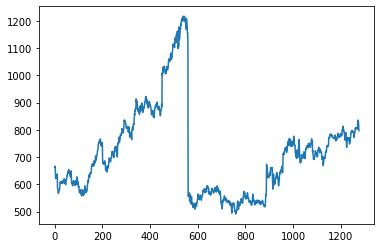

In [ ]:
plt.plot(data1)

In [ ]:
# MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
data1

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.45768505],
       [0.42875846],
       [0.42113749]])

In [ ]:
training_size=int(len(data1)*0.80)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_test.shape), print(ytest.shape)

(155, 100)
(155,)


(None, None)

In [ ]:
print(X_train.shape), print(y_train.shape)

(921, 100)
(921,)


(None, None)

In [ ]:
# reshape input to be array
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
#build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #LSTM layer
model.add(LSTM(50,return_sequences=True)) #LSTM layer
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1) #fitting the model

Epoch 1/50
15/15 [==============================] - 8s 228ms/step - loss: 0.0594 - val_loss: 0.0069
Epoch 2/50
15/15 [==============================] - 2s 160ms/step - loss: 0.0147 - val_loss: 8.5459e-04
Epoch 3/50
15/15 [==============================] - 2s 151ms/step - loss: 0.0094 - val_loss: 9.1386e-04
Epoch 4/50
15/15 [==============================] - 2s 148ms/step - loss: 0.0083 - val_loss: 7.3153e-04
Epoch 5/50
15/15 [==============================] - 2s 149ms/step - loss: 0.0074 - val_loss: 7.2882e-04
Epoch 6/50
15/15 [==============================] - 2s 149ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 7/50
15/15 [==============================] - 2s 148ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 8/50
15/15 [==============================] - 2s 152ms/step - loss: 0.0062 - val_loss: 0.0013
Epoch 9/50
15/15 [==============================] - 2s 151ms/step - loss: 0.0053 - val_loss: 6.3803e-04
Epoch 10/50
15/15 [==============================] - 2s 155ms/step - loss: 0.004

In [ ]:
import tensorflow as tf

In [ ]:
#LSTM prediction
train_predict=model.predict(X_train)
y_predicate=model.predict(X_test)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.03933083680428229

In [ ]:
#error calculation
from sklearn import metrics
print("root mean squared error :",np.sqrt(metrics.mean_squared_error(ytest,y_predicate)))
print("mean squared error :", metrics.mean_squared_error(ytest,y_predicate))
print("mean absolute :", metrics.mean_absolute_error(ytest,y_predicate))

In [ ]:
#model evaluation accuracy
from sklearn.metrics import r2_score
r2_score(ytest,y_predicate)

0.7674544771350787

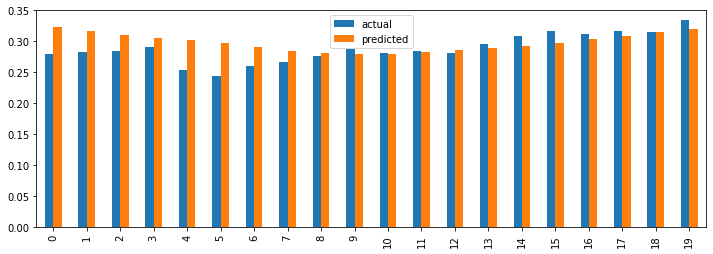

In [ ]:
#visualization for evaluation
dataFram2= pd.DataFrame({'actual':ytest.flatten(), 'predicted':y_predicate.flatten()})

visual= dataFram2.head(20)
visual.plot(kind='bar',figsize=(12, 4))